# This notebook is to evaluate different networks

# Table of contents
## <a href='#Evaluation-1:-Evaluate-the-whole-network-with-different-communities-by-changing-community-detection-parameters'>1. Evaluate whole network with different communities</a>
### <a href='#Evaluation-1.1:-how-do-#-genes-change-in-each-community-when-community-assingment-changes?'>1.1 How do # genes change in each community?</a>
### <a href='#Evaluation-1.2:-how-does-network-cluster-stability-change-when-community-assingment-changes?'>1.2 How do network cluster stability change?</a>
### <a href='#Evaluation-1.3:-how-do-%-DE-in-each-community-change-when-community-assingment-changes?'>1.3 How do % DE in each community change?</a>
### <a href='#Evaluation-1.4:-how-do-%-of-significant-genes-change-when-community-assingment-changes-(This-process-takes->10-min-to-run)'>1.4 How do significant gene % change with different community assignment</a>
### <a href='#Evaluation-1.5:-how-do-trait-and-community-correlation-change-when-community-assignment-change'>1.5 How do trait and community correlation change with different community assignment</a>
## <a href='#Evaluation-2:-Evaluate-subnetwork-quality-by-comparing-to-the-whole-network'>2. Evaluate subnetwork by comparing to the whole network</a>
### <a href='#Evaluation-2.1:-does-the-scale-free-network-assumption-still-hold-in-the-subnetwork?'>2.1 Does scale-free assumption still hold in the subnetwork</a>
### <a href='#Evaluation-2.2:-compare-network-distance-by-GED-and-deltacon'>2.2 Compare distance between networks</a>
## <a href='#Evaluation-3:-compare-subnetworks-by-their-communities'>3. Compare subnetwork communities</a>
### <a href='#Evaluation-3.1:-compare-subnetwork-similarities'>3.1 Compare communities of the subnetwork</a>
### <a href='#Evaluation-3.2:-how-do-the-subnetwork-communities-compare-to-the-whole-network-in-terms-of-correlation-with-the-alcohol-phenotypes?'> 3.2 How do the communities compare between whole and subnetworks functionally?</a>

In [1]:
import sys
sys.path.append("../..")
import pandas as pd
from sys import platform 
from src.eda.eda_functions import *
from src.eda.subset_network import subset_network
from src.eda.process_phenotype import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%%time
prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'
tom_df = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/Kapoor_TOM.csv', index_col = 0)

Wall time: 6min 54s


# preprocessing steps outside the Docker containers

In [3]:
## expression_meta using the published Kapoor data
# expression = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/kapoor_expression_Apr5.txt',sep = '\t')
# meta = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/kapoor2019_coga.inia.detailed.pheno.04.12.17.csv', low_memory = False)
# expression_meta = pd.merge(expression, meta, left_index = True, right_on = 'IID')
# expression_meta.to_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/expression_meta_Apr6.csv', index = 0)

In [3]:
# expression = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/kapoor2019_batch.age.rin.sex.pm.alc.corrected.coga.inia.expression.txt', sep = '\t')
# network_IDs = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/network_IDs.csv', index_col = 0)
# network_only_expression = expression[expression['id'].isin(network_IDs['0'])]
# network_only_expression.to_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/kapoor_expression.txt', sep = '\t', index = 0)

# Evaluation 1: Evaluate the whole network with different communities by changing community detection parameters

### Docker Module Extraction

In [2]:
## read in the WGCNA modules (created in R) as the baseline with 1 setting only
wgcna_modules = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/wgcna_modules.csv')

In [4]:
# rename the columns, although wgcna used hclust, I renamed it as louvain so could compare with other louvain clusters
# wgcna_modules.rename(columns = {'Unnamed: 0':'id', 'x':'louvain_label'}, inplace = True)

In [5]:
# wgcna_modules.to_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/wgcna_modules.csv', index = 0)

In [4]:
# test with 2 sets of parameters (change resolution only)
start = time.time()
comm_df1 = run_louvain(tom_df, 1, -1) # default setting
comm_df2 = run_louvain(tom_df, 1, 1)
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

time delta: 304.56524562835693 seconds


In [6]:
comm_df1.to_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/network_louvain_default.csv', index = 0)

In [3]:
comm_df1 = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/network_louvain_default.csv')
comm_df2 = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/network_louvain_agg1.csv')

## Evaluation 1.1: how do # genes change in each community when community assingment changes?

### Docker Module membership analysis

Removing existing folder: output
Created folder output


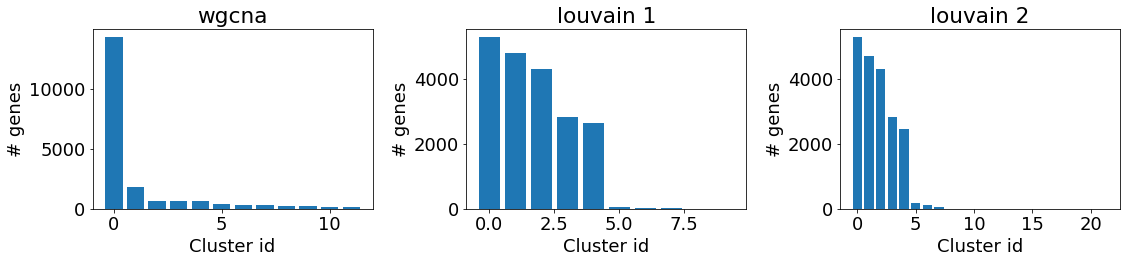

In [4]:
comm_dfs = [wgcna_modules,comm_df1, comm_df2]
comm_names = ['wgcna','louvain 1', 'louvain 2']
plot_gene_cnt_each_cluster(comm_dfs, 'louvain_label', comm_names)

## Evaluation 1.2: how does network cluster stability change when community assingment changes?

In [5]:
expression_meta = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/expression_meta.csv', low_memory = False)

In [6]:
start = time.time()
cluster_pair_wgcna_n_com1, network_cluster_stability1 = network_cluster_stability(wgcna_modules, comm_df1, 'louvain_label', expression_meta)
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

time delta: 445.34357047080994 seconds


### The histogram shows distribution for z scores for p value or correlation coefficient if the cluster membership is randomly assigned. The red vertical line is where the actual Z score is. For p value, the red line should be as left as possible for small p values for the actual cluster. For correlation coefficient, the red line should be either very left or very right to be very negatively correlated or very positively correlated for the actual cluster.

### Docker Module membership analysis

Removing existing folder: output
Created folder output


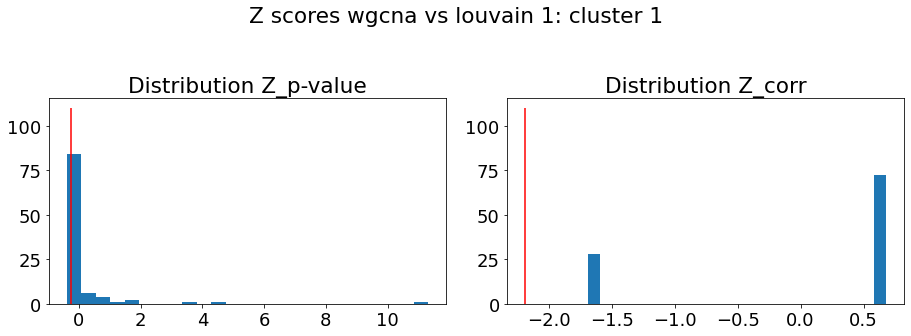

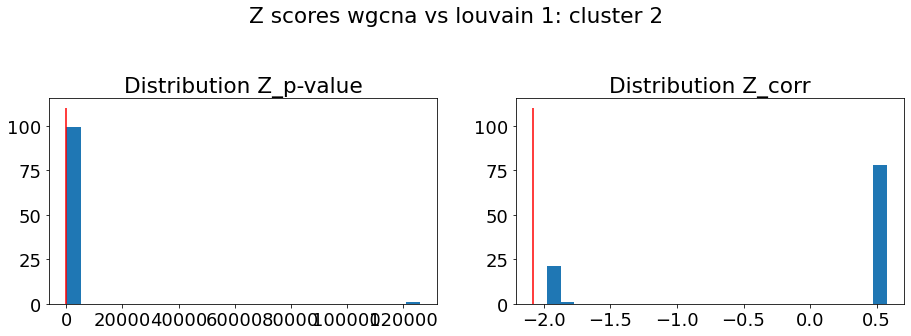

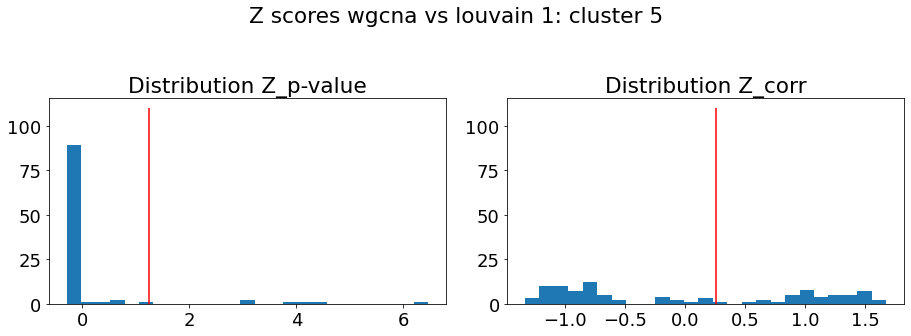

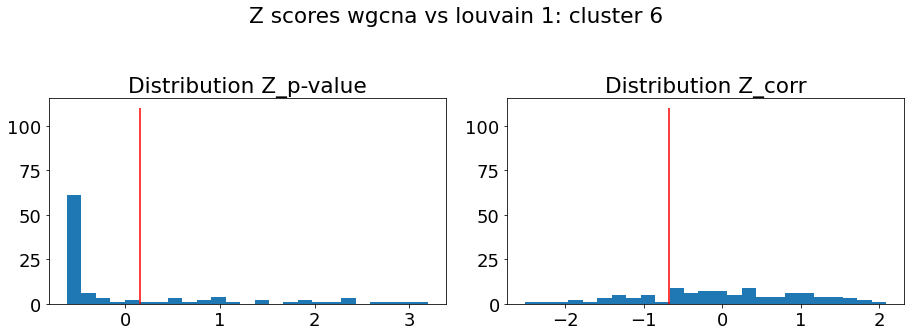

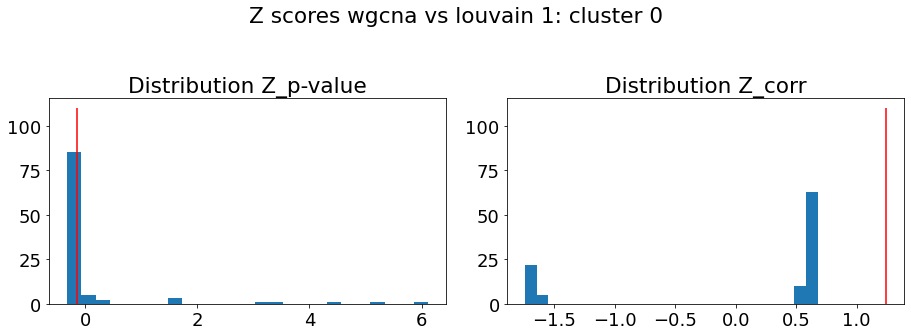

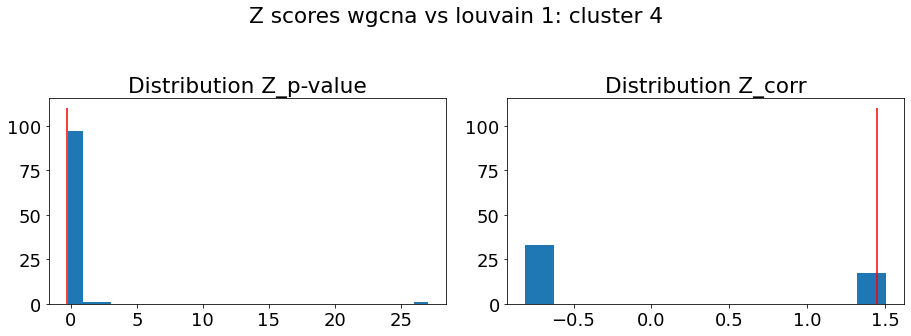

In [ ]:
start = time.time()
for cluster in comm_df1.louvain_label.unique():
    plot_random_vs_actual_z(wgcna_modules, comm_df1, cluster_pair_wgcna_n_com1[cluster], cluster, 'louvain_label', network_cluster_stability1, 'wgcna vs louvain 1', expression_meta)
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

## Evaluation 1.3: how do % DE in each community change when community assingment changes?

### Docker Module DE/ Diagnostic Correlation

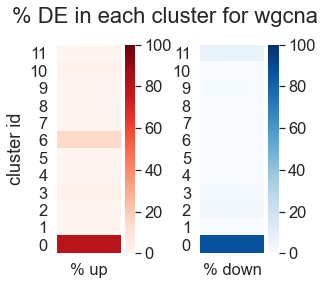

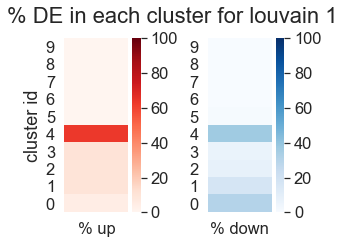

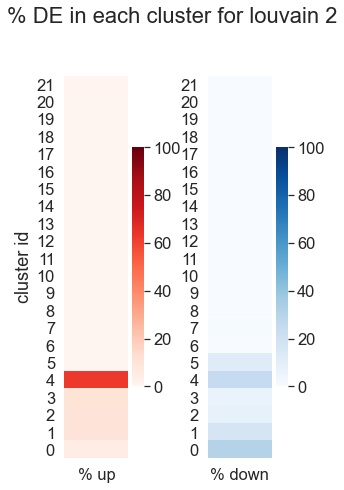

In [12]:
for i, cluster_df in enumerate(comm_dfs):
    cluster_DE_perc(cluster_df, 'louvain_label', comm_names[i])

## Evaluation 1.4: how do % of significant genes change when community assingment changes (This process takes >10 min to run)

### Docker Module DE/ Diagnostic Correlation

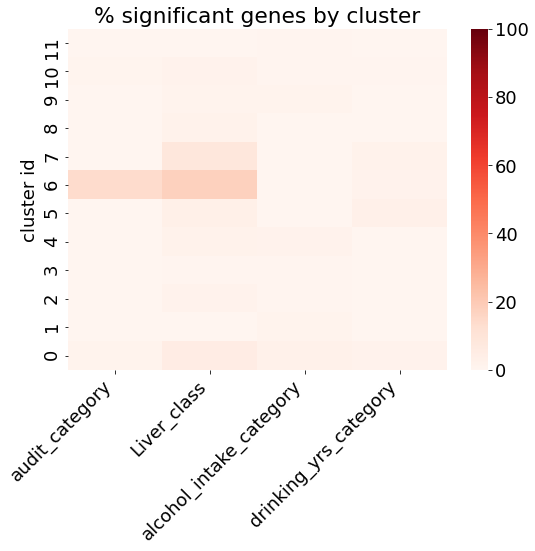

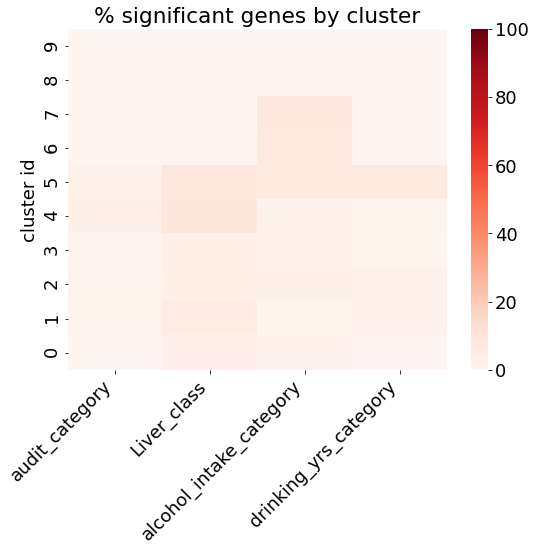

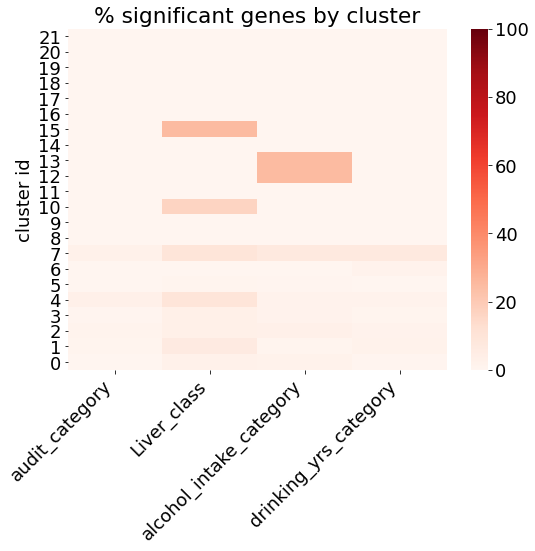

Wall time: 22min 24s


In [25]:
%%time
cluster_df_names = ['wgcna','louvain 1', 'louvain 2']
for i, cluster_df in enumerate([wgcna_modules,comm_df1, comm_df2]):
    plot_sig_perc(cluster_df, 'louvain_label', cluster_df_names[i], expression_meta)

## Evaluation 1.5: how do trait and community correlation change when community assignment change

### Docker Module DE/ Diagnostic Correlation

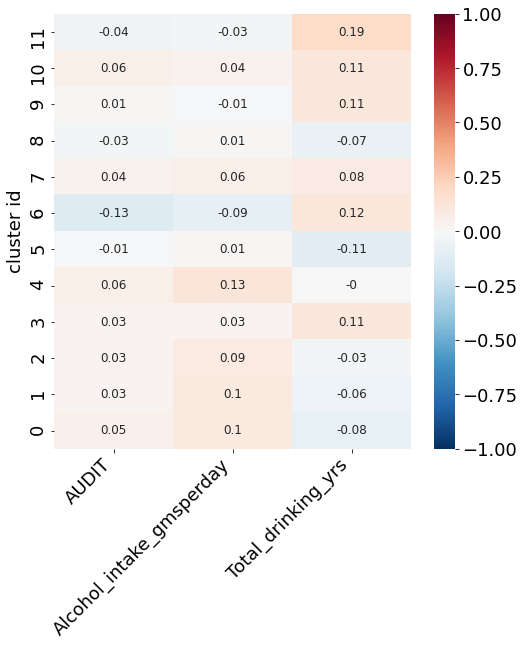

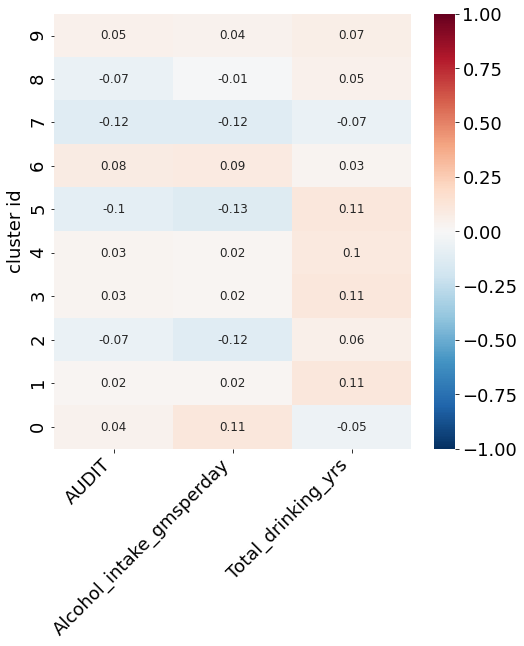

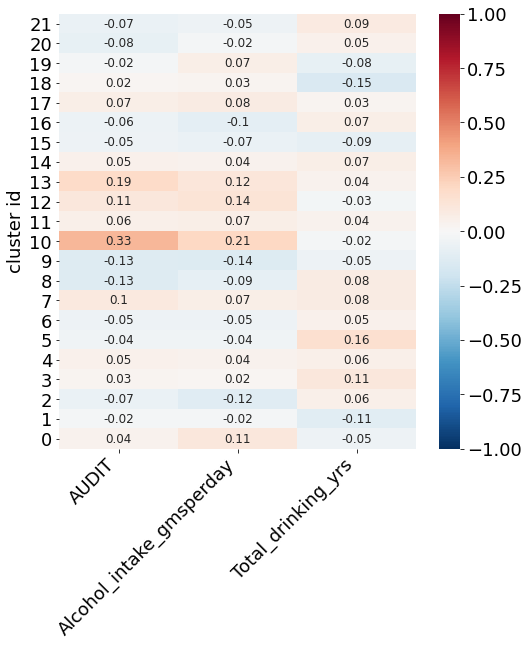

Wall time: 11.2 s


In [22]:
%%time
cluster_df_names = ['wgcna','louvain 1', 'louvain 2']
for i, cluster_df in enumerate([wgcna_modules,comm_df1, comm_df2]):
    cluster_phenotype_corr(cluster_df, 'louvain_label', cluster_df_names[i], expression_meta)

# Evaluation 2: Evaluate subnetwork quality by comparing to the whole network

## Evaluation 2.1: does the scale-free network assumption still hold in the subnetwork?

### Docker Module Subselection

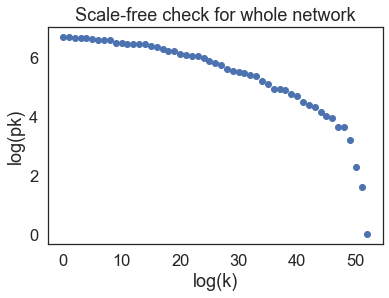

In [14]:
# Original network with no cutoff
scale_free_validate(tom_df, 'whole network')

#### Changes on 1/12/2021

Removing existing folder: output
Created folder output


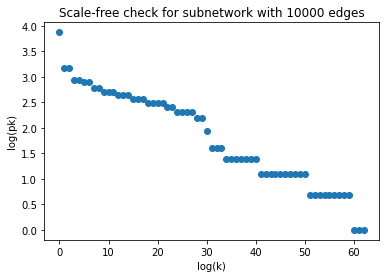

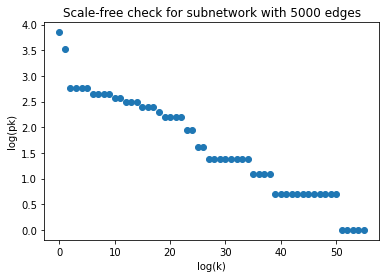

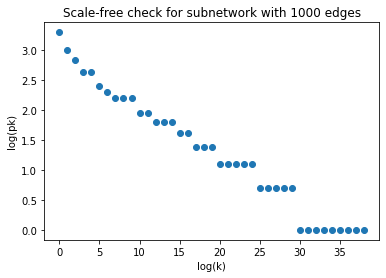

time delta: 999.9106686115265 seconds


In [12]:
eda_derived_path = prefix +'/Shared drives/NIAAA_ASSIST/Data/eda_derived/'
start = time.time()
subset_networks = []
for edge in [10000,5000,1000]:
    subset, G = subset_network(tom_df, 0.21, 0.99, edge, subnetwork_dir = eda_derived_path+f'subnetwork_{edge}_edges.csv') # the subnetwork is now exported as a df
    subset_networks.append(subset) 
    scale_free_validate(subset, f'subnetwork with {edge} edges')
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

## Evaluation 2.2: compare network distance by GED and deltacon

### Note to use DeltaCon, the graphs need to have the same number of nodes so use subnetwork without removing the nodes with degree = 0

### Docker Module Subselection

In [16]:
start = time.time()
subset_networks2 = []
subset_G = []
for weight in [0.218, 0.24, 0.278]:
    subset, G = subset_network(tom_df, weight, 0.98)
    subset_networks2.append(subset)
    subset_G.append(G)
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

Number of edges left: 10100.0
Number of edges left: 4967.0
Number of edges left: 1092.0
time delta: 74.96587061882019 seconds


time delta: 819.6099183559418 seconds


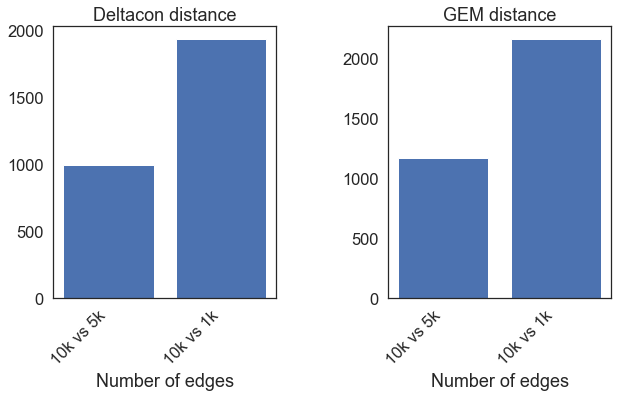

In [17]:
start = time.time()
plot_graph_distance(subset_networks2, ['10k', '5k', '1k'])
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

# Evaluation 3: compare subnetworks by their communities

## Evaluation 3.1: compare subnetwork similarities

### Evaluation 3.1a: comparison by jaccard

In [18]:
start = time.time()
subset_communities = []
for subset in subset_networks:
    subset_communities.append(run_louvain(subset))
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

time delta: 0.09767031669616699 seconds


time delta: 2.5001909732818604 seconds


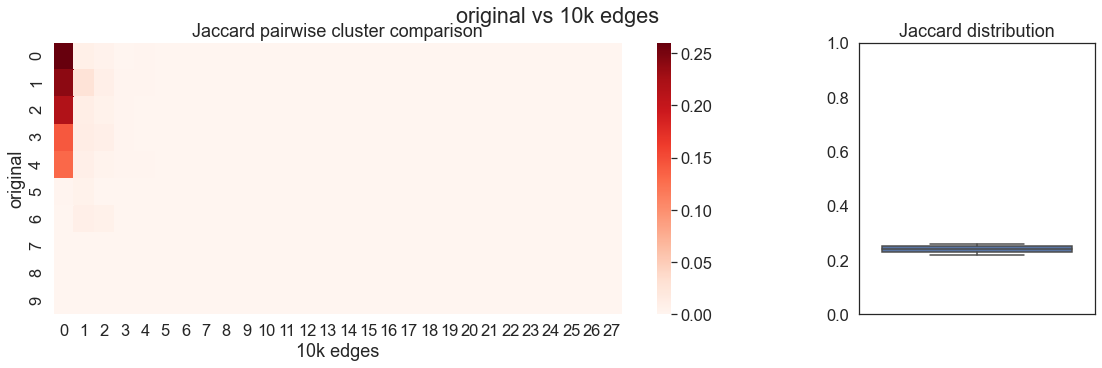

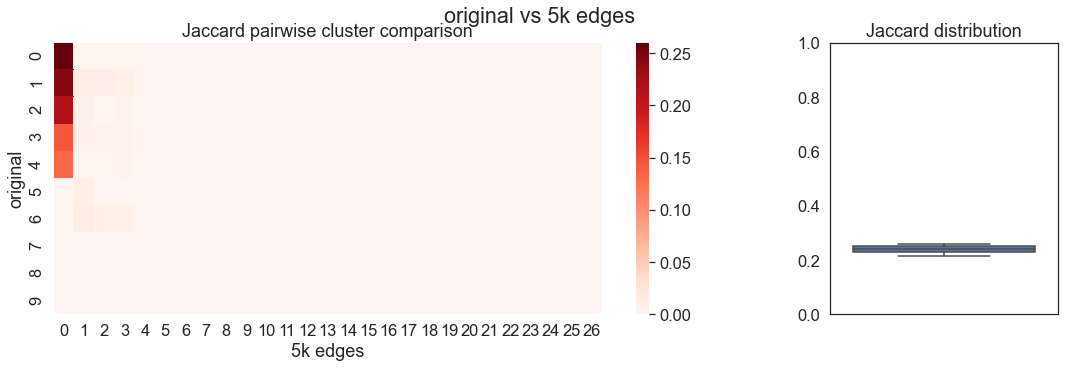

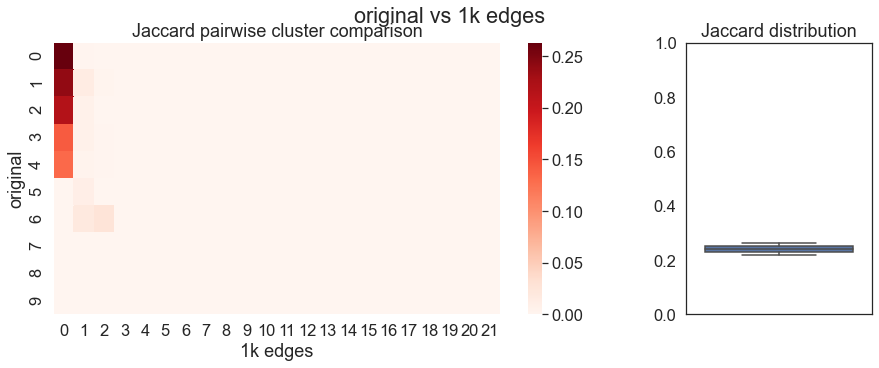

In [19]:
start = time.time()
subset_names = ['10k edges', '5k edges', '1k edges']
for i, subset_com in enumerate(subset_communities):
    cluster_jaccard(comm_df1, subset_com, 'louvain_label', ['original', subset_names[i]], cutout_nodes = False, top=3)
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

### Evaluation 3.1b: comparison by jaccard (nodes with degree = 0 excluded)

### Docker Module Subselection

time delta: 1.7245125770568848 seconds


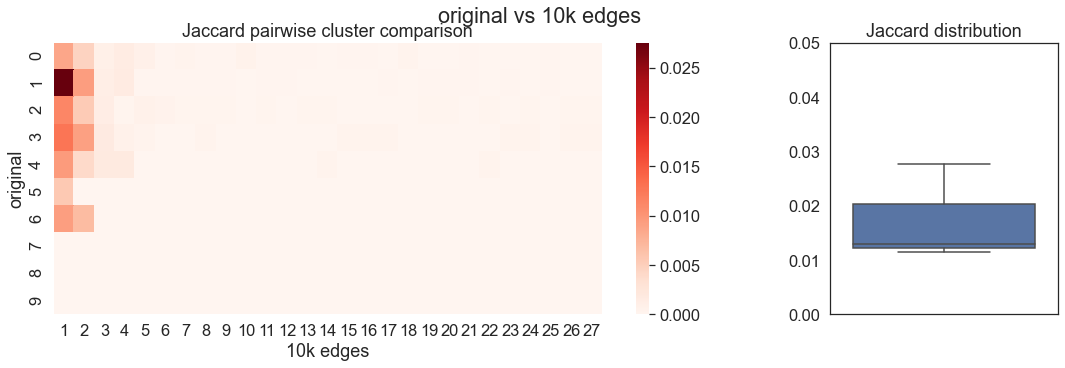

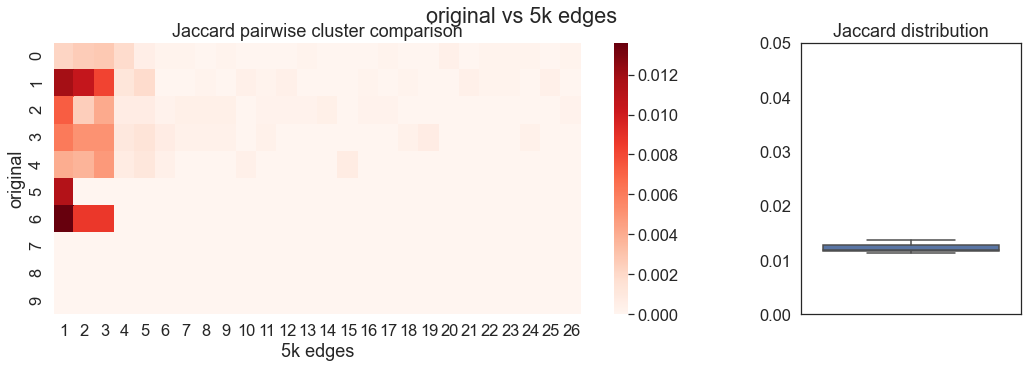

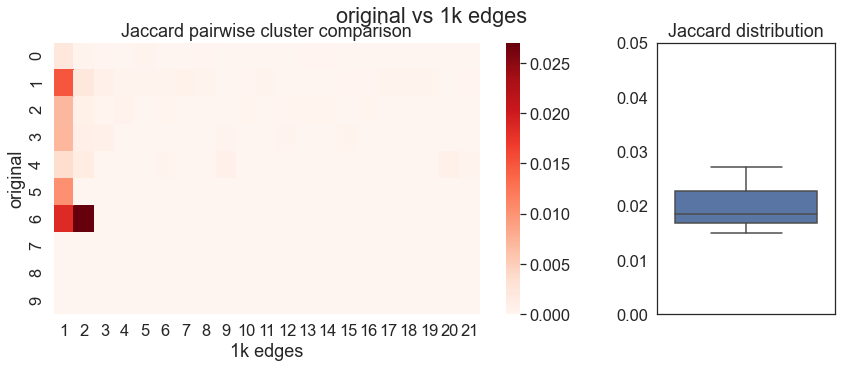

In [20]:
start = time.time()
for i, subset_com in enumerate(subset_communities):
    cluster_jaccard(comm_df1, subset_com, 'louvain_label', ['original', subset_names[i]], cutout_nodes = True, top=3, y_max = 0.05)
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

### Evaluation 3.1c: comparison of subnetwork by normalized mutual information

### Docker Module Subselection

time delta: 0.040879249572753906 seconds


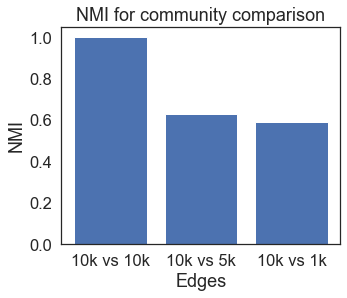

In [21]:
start = time.time()
plot_cluster_nmi_comparison(subset_communities[0], subset_communities, 
                            'louvain_label', ['10k vs 10k', '10k vs 5k', '10k vs 1k'])
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

time delta: 0.07373976707458496 seconds


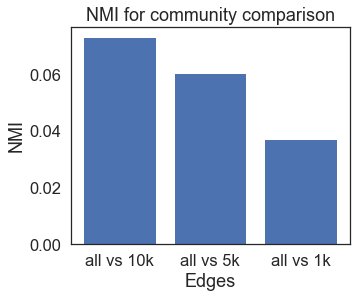

In [22]:
start = time.time()
plot_cluster_nmi_comparison(comm_df1, subset_communities, 
                            'louvain_label', ['all vs 10k', 'all vs 5k', 'all vs 1k'])
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

## Evaluation 3.2: how do the subnetwork communities compare to the whole network in terms of correlation with the alcohol phenotypes?

### Evaluation 3.2a: compare whole network and subnetwork communities by % DE in each community

### Docker Module Subselection

time delta: 5.905216932296753 seconds


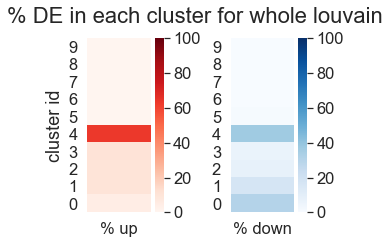

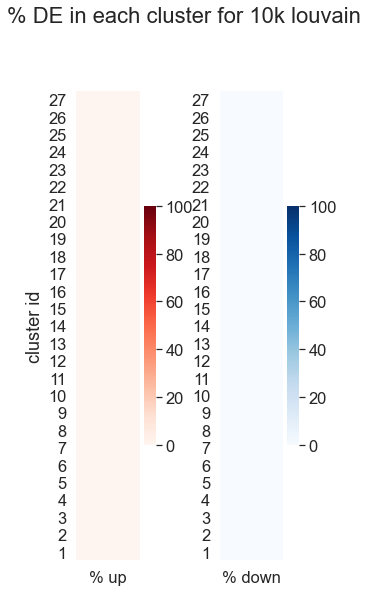

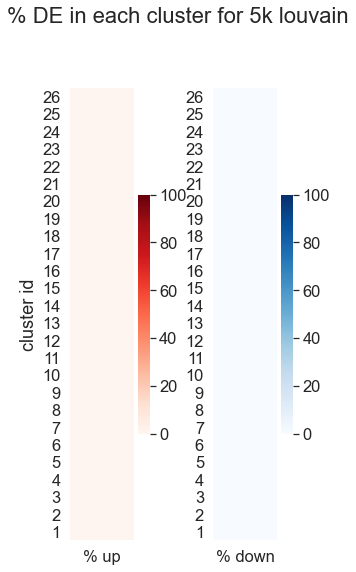

In [23]:
start = time.time()
subset_names = ['whole louvain','10k louvain','5k louvain']
for i, cluster_df in enumerate([comm_df1, subset_communities[0], subset_communities[1]]):
    cluster_DE_perc(cluster_df, 'louvain_label', subset_names[i])
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

### Evaluation 3.2b: compare whole network and subnetwork communities by % significant genes in each cluster

### Docker Module Subselection

time delta: 355.31472539901733 seconds


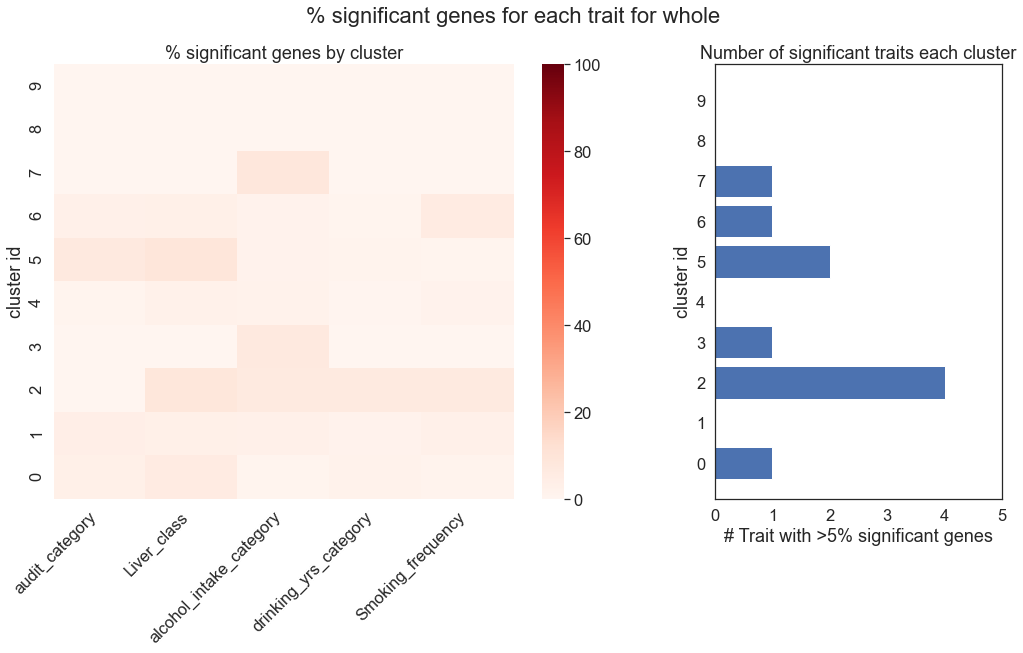

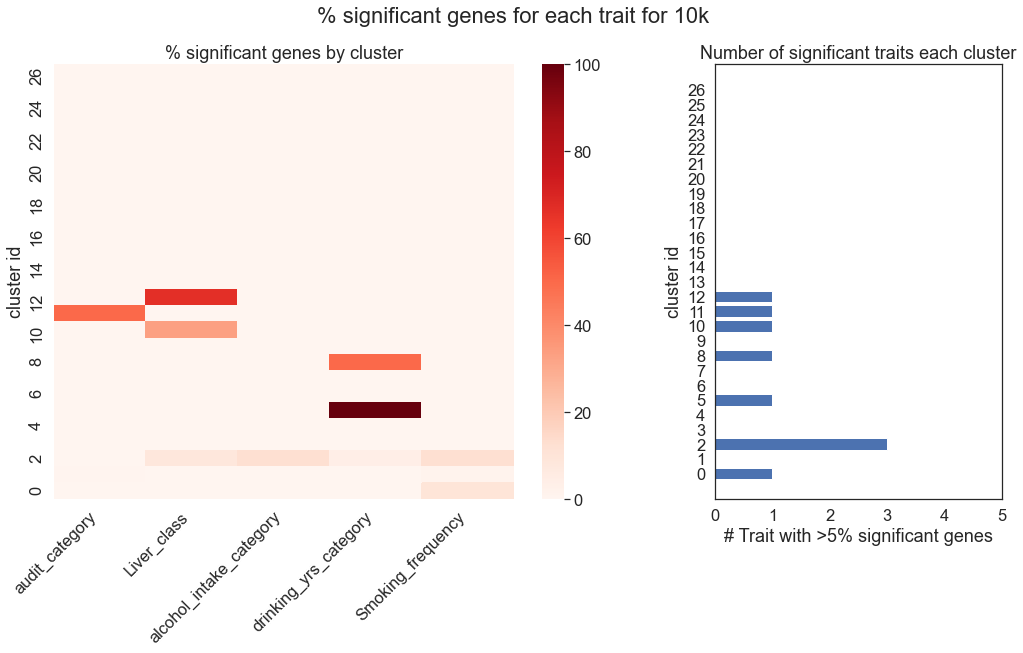

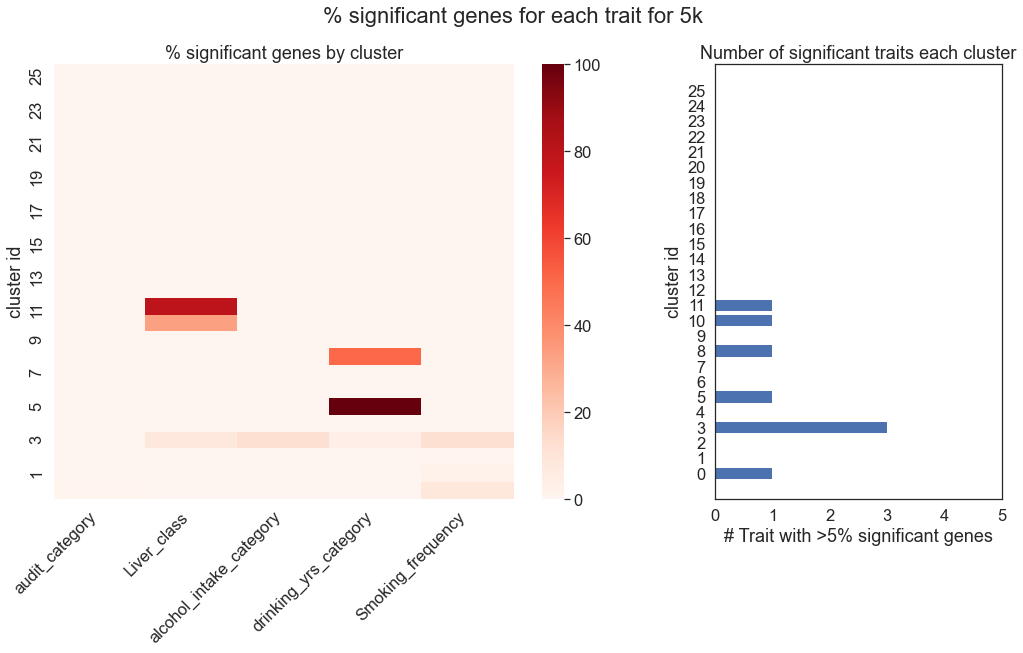

In [24]:
start = time.time()
subset_names = ['whole','10k','5k']
for i, cluster_df in enumerate([comm_df1,subset_communities[0], subset_communities[1]]):
    plot_sig_perc(cluster_df, 'louvain_label', subset_names[i])
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')

### Evaluation 3.2c: compare whole network and subnetwork communities by cluster and trait correlation

### Docker Module Subselection

time delta: 4.655138731002808 seconds


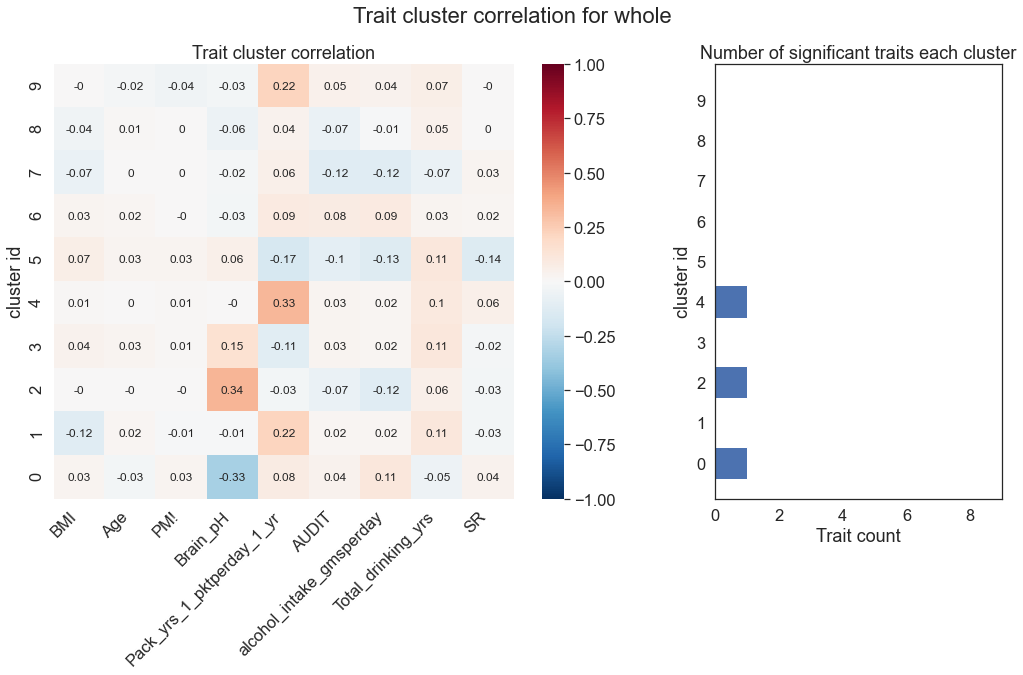

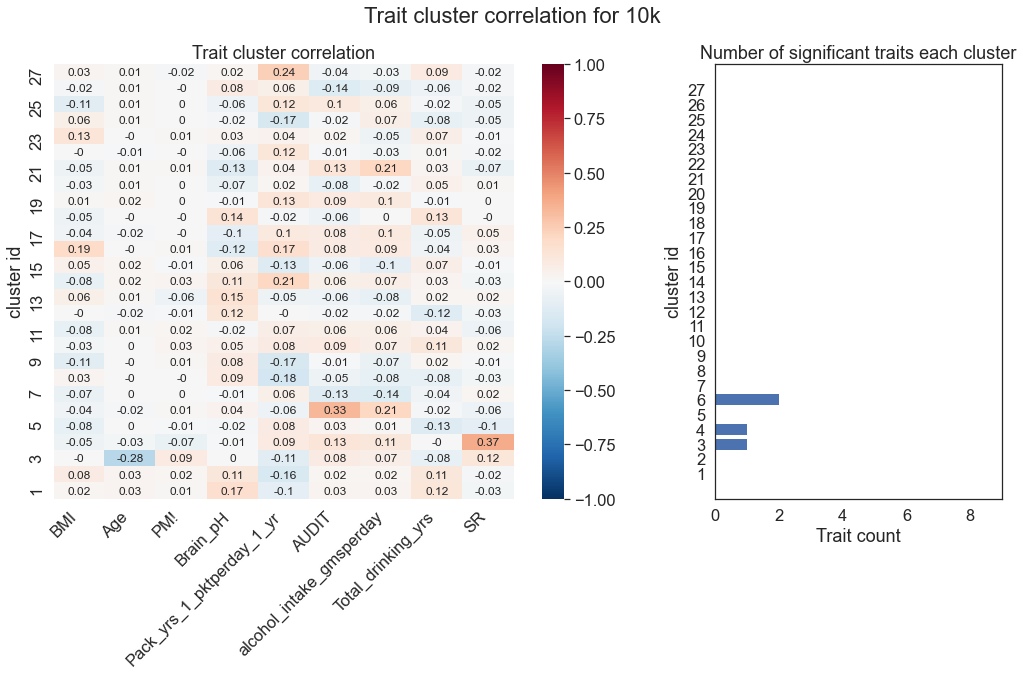

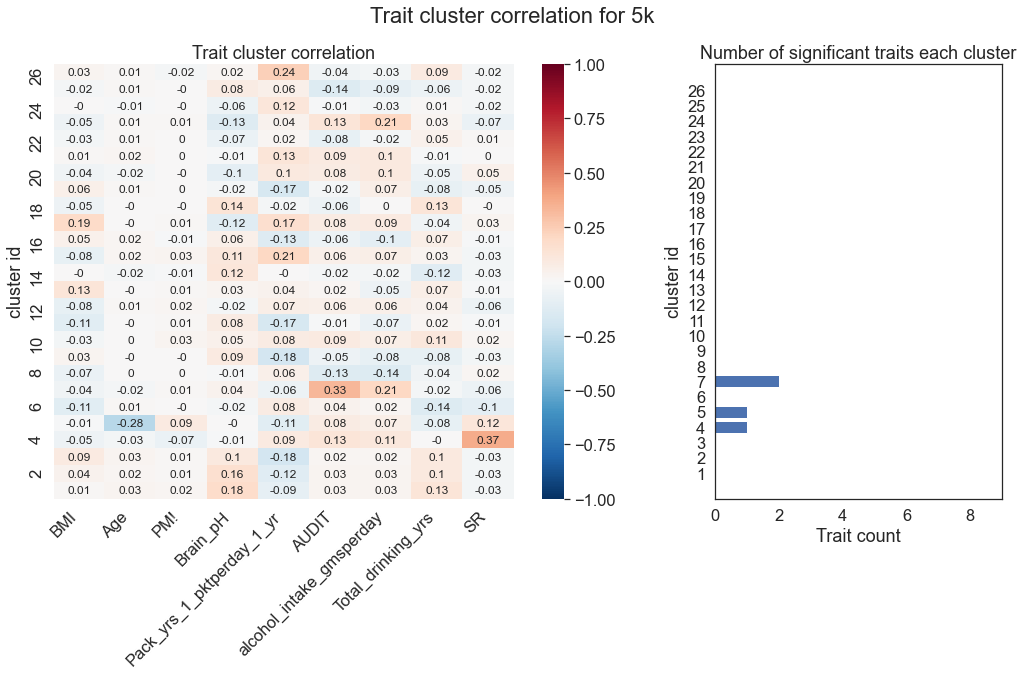

In [25]:
start = time.time()
for i, cluster_df in enumerate([comm_df1,subset_communities[0], subset_communities[1]]):
    cluster_phenotype_corr(cluster_df, 'louvain_label', subset_names[i])
end = time.time()
delta = end - start
print(f'time delta: {delta} seconds')